In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from src import orbits as orb
from Utilities import sections as sec

from Utilities.operators import make_tree, from_cylindric
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

<Figure size 800x600 with 0 Axes>

In [2]:
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
check = 'Low' # '' or 'HiRes' or 'Res20'
check1 = 'HiRes' 
check2 = 'Res20'
folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}'
snap = '164'
snap2 = '169'
path = f'TDE/{folder}{check}/{snap}'
path1 = f'TDE/{folder}{check1}/{snap}'
path2 = f'TDE/{folder}{check2}/{snap2}'
#saving_path = f'Figs/{folder}/{check}'
#print(f'We are in: {path}, \nWe save in: {saving_path}')
is_tde = True
threshold=1/3

Rt = Rstar * (Mbh/mstar)**(1/3)
Rp =  Rt / beta
R0 = 0.6 * Rp
apo = Rt**2 / Rstar #2 * Rt * (Mbh/mstar)**(1/3)

G_SI = 6.6743e-11
Msol = 2e30 #1.98847e30 # kg
Rsol = 7e8 #6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G_SI ))
c = 3e8 / (7e8/t)

Rs = 2*G*Mbh / c**2

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)

Load data

In [3]:
# sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp, IE, Diss, Entropy = make_tree(path, snap, is_tde, energy = True)
data = make_tree(path, snap, is_tde, energy = False)
# data1 = make_tree(path1, snap, is_tde, energy = False)
# data2 = make_tree(path2, snap2, is_tde, energy = False)

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')


THETA, RADIUS_cyl = orb.to_cylindric(data.X, data.Y)
# THETA1, RADIUS_cyl1 = orb.to_cylindric(data1.X, data1.Y)
# THETA2, RADIUS_cyl2 = orb.to_cylindric(data2.X, data2.Y)

dim_cell = data.Vol**(1/3) 
# dim_cell1 = data1.Vol**(1/3) 
# dim_cell2 = data2.Vol**(1/3) 

tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

days after disruption: 1.3532153925058021 // t_fall: 2.5777261297507925 // sim_time: 73.40236449912129


Midplane 

In [4]:
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, Mass_midplane, Den_midplane, = \
    sec.make_slices([data.X, data.Y, data.Z, dim_cell, data.Mass, data.Den], midplane)

# midplane1 = np.abs(data1.Z) < dim_cell1
# X_midplane1, Y_midplane1, Z_midplane1, dim_midplane1, Mass_midplane1, Den_midplane1 = \
#     sec.make_slices([data1.X, data1.Y, data1.Z, dim_cell1, data1.Mass, data1.Den], midplane1)

# midplane2 = np.abs(data2.Z) < dim_cell2
# X_midplane2, Y_midplane2, Z_midplane2, dim_midplane2, Mass_midplane2, Den_midplane2 = \
#     sec.make_slices([data2.X, data2.Y, data2.Z, dim_cell2, data2.Mass, data2.Den], midplane2)

Tangent and transverse plane

In [5]:
theta_lim = np.pi#3*np.pi/4
step = 0.02
theta_params = [-theta_lim, theta_lim, step]
theta_arr = np.arange(*theta_params)

#r_orbit = orb.keplerian_orbit(theta_arr, apo, a = Rp, ecc = 0.972)
x_orbit, y_orbit = orb.find_maximum(X_midplane, Y_midplane, dim_midplane, Den_midplane, theta_arr, Rt)
# x_orbit1, y_orbit1 = orb.find_maximum(X_midplane1, Y_midplane1, dim_midplane1, Den_midplane1, theta_arr, Rt)
# x_orbit2, y_orbit2 = orb.find_maximum(X_midplane2, Y_midplane2, dim_midplane2, Den_midplane2, theta_arr, Rt)

(-40.0, 60.0)

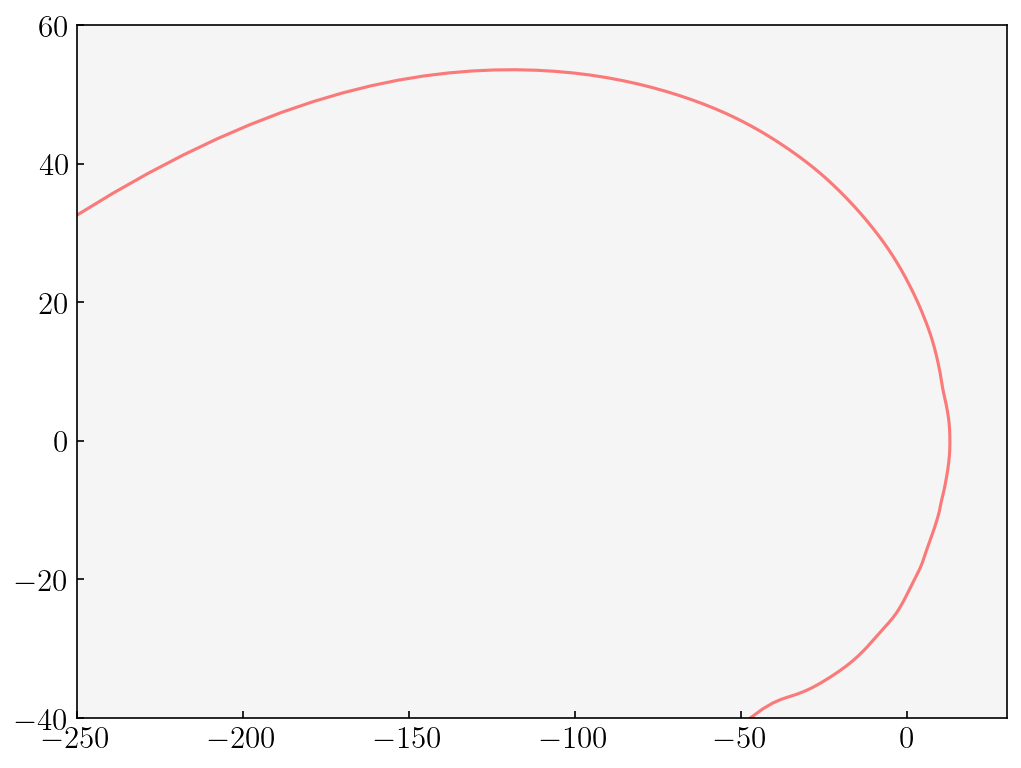

In [6]:
# Just one projection
vmaxrho = 5e-8
vminrho = 1/3 * vmaxrho - 1e-8 # -1 to see the lower values
tg_vectors = np.zeros((len(theta_arr), 2))
for idx in range(len(theta_arr)):
    theta_chosen = theta_arr[idx]
    x_chosen, y_chosen = x_orbit[idx], y_orbit[idx]
    tg, x_smh, y_smh = sec.tangent_versor(x_orbit, y_orbit, idx, smooth_orbit=True)
    tg_vectors[idx][0], tg_vectors[idx][1] = tg[0], tg[1]
#plt.quiver(x_smh[1:-6], y_smh[1:-6], tg_vectors[1:-6,0], tg_vectors[1:-6,1], color = 'k',  width = 1.5e-3, scale_units = 'xy')
plt.plot(x_smh[1:-6], y_smh[1:-6], c = 'r', alpha = 0.5)
plt.xlim(-250,30)
plt.ylim(-40,60)


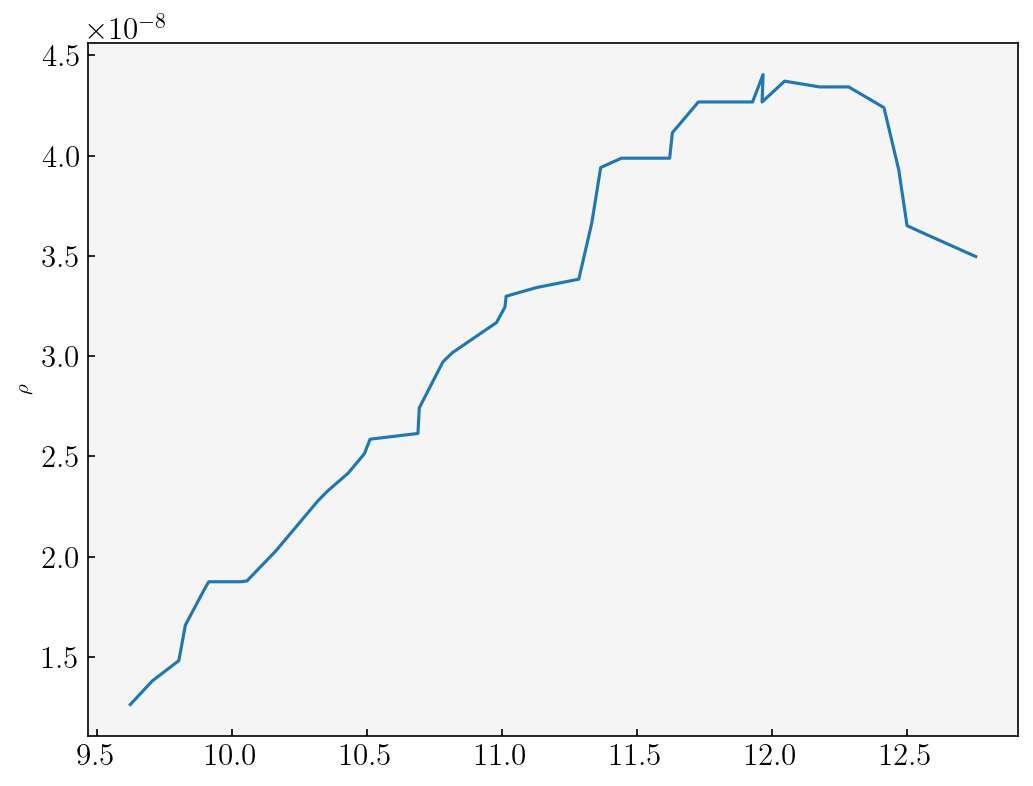

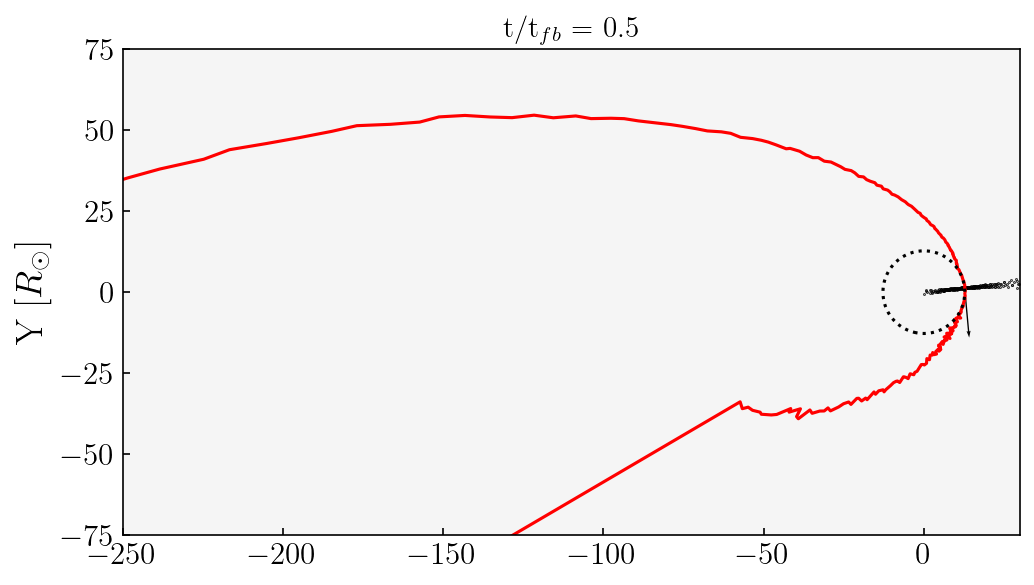

In [8]:
# Check the transverse plane and the 
vmaxrho = 5e-8
vminrho = 1/3 * vmaxrho - 1e-8 # -1 to see the lower values
idx = 152
theta_chosen = theta_arr[idx]
x_chosen, y_chosen = x_orbit[idx], y_orbit[idx]

condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, idx, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
cm_double, lower_tube_w, upper_tube_w, lower_tube_h, upper_tube_h, w_params, h_params = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, data.Den, x_orbit, y_orbit, idx, threshold = 0.33)

tg = sec.tangent_versor(x_orbit, y_orbit, idx)

plt.figure(figsize = (7,4))
plt.plot(x_orbit[1:-6], y_orbit[1:-6], c = 'r')
# plt.scatter([lower_tube_w[0], upper_tube_w[0]], [lower_tube_w[2], upper_tube_w[2]], c = ['navy', 'c'], marker = 'x', s = 20)
plt.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
plt.scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
plt.quiver(x_chosen, y_chosen, tg[0], tg[1], color = 'k',  width = 1.5e-3, scale_units = 'xy')
# plt.scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'royalblue')
plt.xlim(-250,30)
plt.ylim(-75,75)
plt.ylabel(r'Y [$R_\odot$]', fontsize = 18)

plt.title(r't/t$_{fb}$ = ' + str(np.round(tfb,1)), fontsize = 14)
plt.tight_layout()

#plt.savefig(f'Figs/{folder}/multiple/wH{idx}.png')
plt.show()

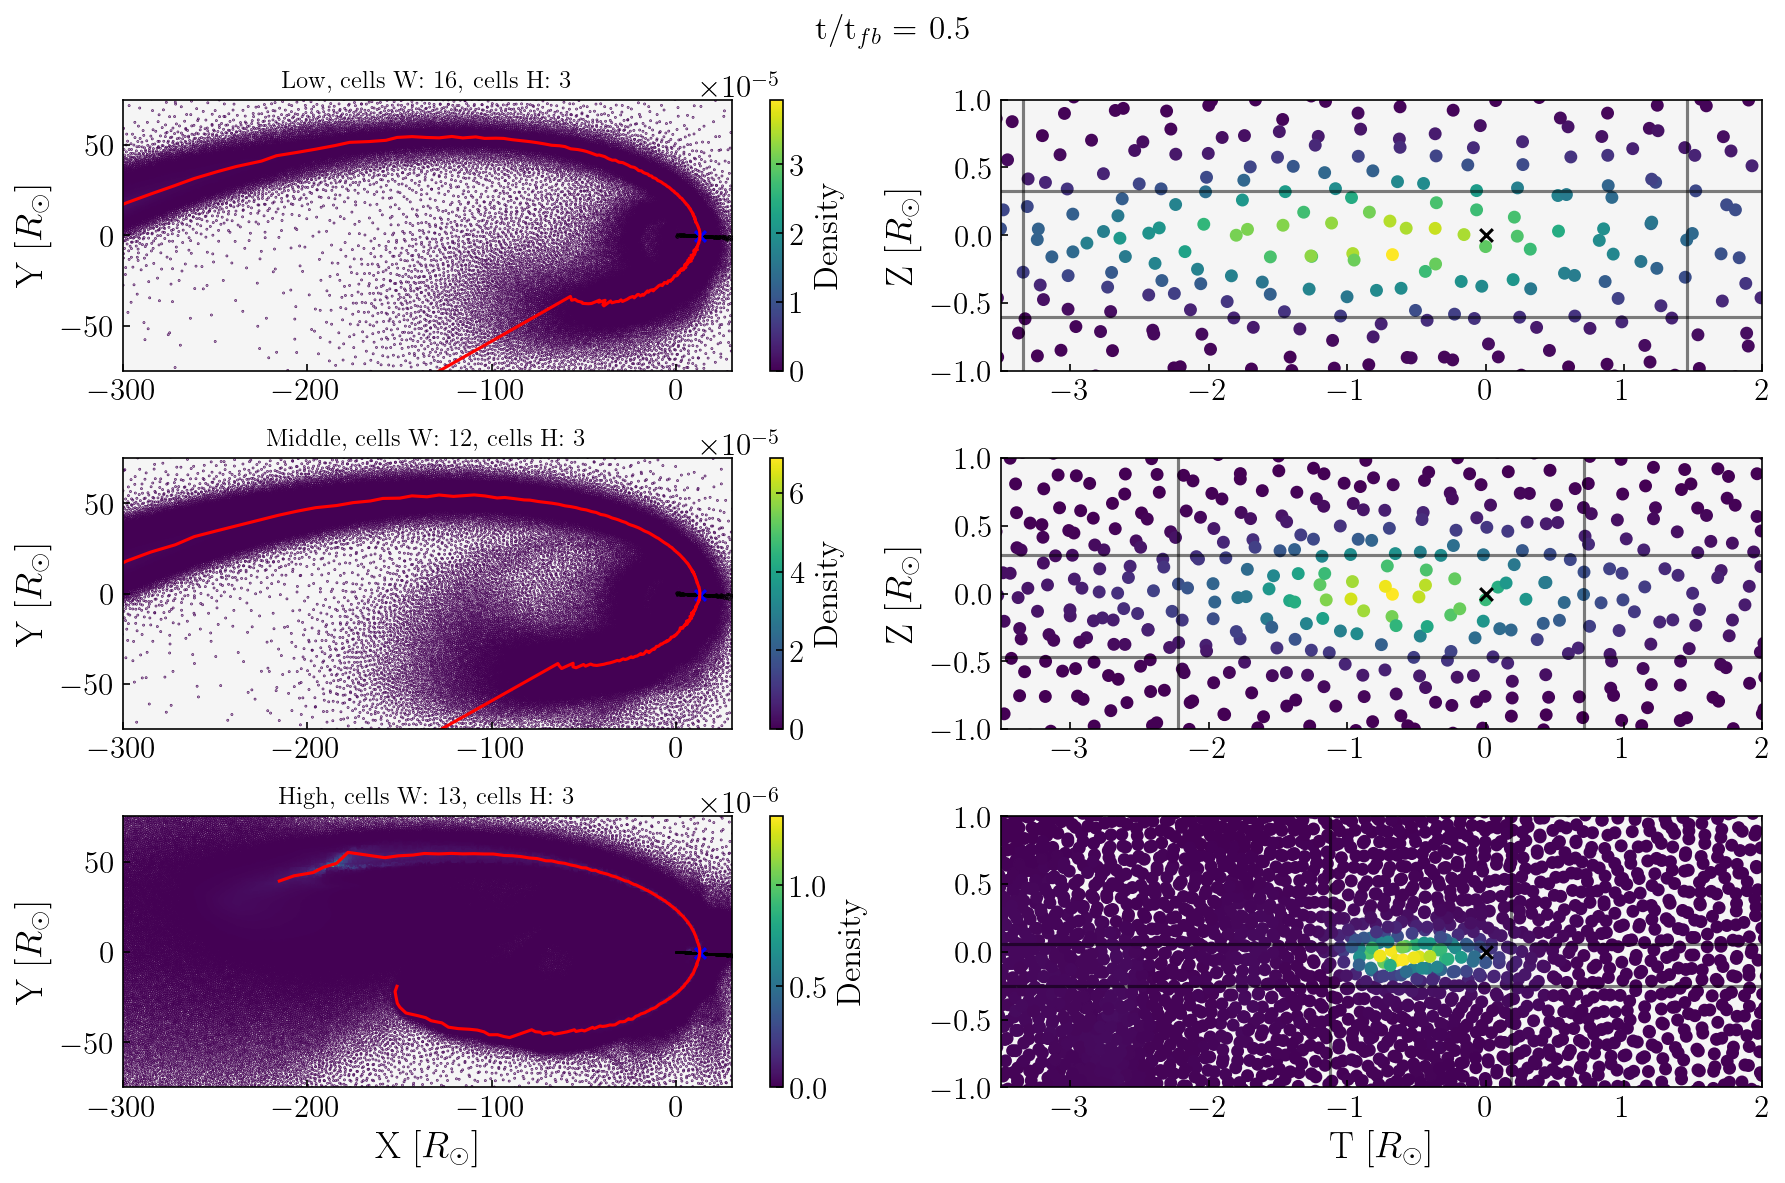

In [21]:
vmaxrho = 5e-8
vminrho = 1/3 * vmaxrho - 1e-8 # -1 to see the lower values
# for idx in range(187,len(theta_arr)): 
#     print(idx)
idx = 160
theta_chosen = theta_arr[idx]
x_chosen, y_chosen = x_orbit[idx], y_orbit[idx]
x_chosen1, y_chosen1 = x_orbit1[idx], y_orbit1[idx]
x_chosen2, y_chosen2 = x_orbit2[idx], y_orbit2[idx]

condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, idx, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
    sec.make_slices([data.X, data.Y, data.Z, data.Den, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
cm_double, lower_tube_w, upper_tube_w, lower_tube_h, upper_tube_h, w_params, h_params = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, data.Den, x_orbit, y_orbit, idx, threshold = 0.33)

# do the same for data1
condition_tra1, x_onplane1, x01 = sec.transverse_plane(data1.X, data1.Y, dim_cell1, x_orbit1, y_orbit1, idx, coord= True)
X_tra1, Y_tra1, Z_tra1, Den_tra1, RADIUS_cyl_tra1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, data1.Den, RADIUS_cyl1], condition_tra1)
X_tra_midplane1 = X_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
Y_tra_midplane1 = Y_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
x_onplane_midplane1 = x_onplane1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
cm_double1, lower_tube_w1, upper_tube_w1, lower_tube_h1, upper_tube_h1, w_params1, h_params1 = orb.find_single_boundaries(data1.X, data1.Y, data1.Z, dim_cell1, data1.Den, x_orbit1, y_orbit1, idx, threshold = 0.33)

# do the same for data2
condition_tra2, x_onplane2, x02 = sec.transverse_plane(data2.X, data2.Y, dim_cell2 ,x_orbit2, y_orbit2, idx, coord= True)
X_tra2, Y_tra2, Z_tra2, Den_tra2, RADIUS_cyl_tra2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, data2.Den, RADIUS_cyl2], condition_tra2)
X_tra_midplane2 = X_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
Y_tra_midplane2 = Y_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
x_onplane_midplane2 = x_onplane2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
cm_double2, lower_tube_w2, upper_tube_w2, lower_tube_h2, upper_tube_h2, w_params2, h_params2 = orb.find_single_boundaries(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, x_orbit2, y_orbit2, idx, threshold = 0.33)
                                
fig, ax = plt.subplots(3,2, figsize = (12,8))
img = ax[0][0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis')#, vmin = vminrho, vmax = vmaxrho)
cbar = plt.colorbar(img)
cbar.set_label(r' Density', fontsize = 16)
ax[0][0].plot(x_orbit[1:-6], y_orbit[1:-6], c = 'r')
# ax[0][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[0][0].scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
ax[0][0].scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
ax[0][0].set_xlim(-300,30)
ax[0][0].set_ylim(-75,75)
ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[0][1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 27)#, vmin = vminrho, vmax = vmaxrho)
ax[0][1].scatter(x0, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[0][1].axvline(lower_tube_w[1], c = 'k', alpha = 0.5)
ax[0][1].axvline(upper_tube_w[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[0][1].set_xlim(-3.5,2)
ax[0][1].axhline(lower_tube_h[0], c = 'k', alpha = 0.5)
ax[0][1].axhline(upper_tube_h[0], c = 'k', alpha = 0.5)
ax[0][1].set_ylim(-1,1)
ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[0][0].set_title(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}', fontsize = 12)

## HiRes
img = ax[1][0].scatter(X_midplane1, Y_midplane1, c = Den_midplane1, s = .1, cmap = 'viridis')#, vmin = vminrho, vmax = vmaxrho)
cbar = plt.colorbar(img)
cbar.set_label(r' Density', fontsize = 16)
ax[1][0].plot(x_orbit1[1:-6], y_orbit1[1:-6], c = 'r')
# ax[1][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[1][0].scatter(X_tra_midplane1, Y_tra_midplane1, s = 0.1, c = 'k')
ax[1][0].scatter(x_chosen1, y_chosen1, marker = 'x', s = 27, c = 'b')
ax[1][0].set_xlim(-300,30)
ax[1][0].set_ylim(-75,75)
ax[1][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[1][1].scatter(x_onplane1, Z_tra1, c = Den_tra1,  cmap = 'viridis', s = 27)#, vmin = vminrho, vmax = vmaxrho)
ax[1][1].scatter(x01, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1][1].axvline(lower_tube_w1[1], c = 'k', alpha = 0.5)
ax[1][1].axvline(upper_tube_w1[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[1][1].set_xlim(-3.5,2)
ax[1][1].axhline(lower_tube_h1[0], c = 'k', alpha = 0.5)
ax[1][1].axhline(upper_tube_h1[0], c = 'k', alpha = 0.5)
ax[1][1].set_ylim(-1,1)
ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[1][0].set_title(f'Middle, cells W: {int(w_params1[1])}, cells H: {int(h_params1[1])}', fontsize = 12)

## Res20
img = ax[2][0].scatter(X_midplane2, Y_midplane2, c = Den_midplane2, s = .1, cmap = 'viridis')#, vmin = vminrho, vmax = vmaxrho)
cbar = plt.colorbar(img)
cbar.set_label(r' Density', fontsize = 16)
ax[2][0].plot(x_orbit2[9:-6], y_orbit2[9:-6], c = 'r')
# ax[2][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[2][0].scatter(X_tra_midplane2, Y_tra_midplane2, s = 0.1, c = 'k')
ax[2][0].scatter(x_chosen2, y_chosen2, marker = 'x', s = 27, c = 'b')
ax[2][0].set_xlim(-300,30)
ax[2][0].set_ylim(-75,75)
ax[2][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[2][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[2][1].scatter(x_onplane2, Z_tra2, c = Den_tra2,  cmap = 'viridis', s = 27)#, vmin = vminrho, vmax = vmaxrho)
ax[2][1].scatter(x02, 0, marker = 'x', s = 37, c = 'k', alpha = 1)
ax[2][1].axvline(lower_tube_w2[1], c = 'k', alpha = 0.5)
ax[2][1].axvline(upper_tube_w2[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[2][1].set_xlim(-3.5,2) # T coordinates for width
ax[2][1].axhline(lower_tube_h2[0], c = 'k', alpha = 0.5)
ax[2][1].axhline(upper_tube_h2[0], c = 'k', alpha = 0.5)
ax[2][1].set_ylim(-1,1)
ax[2][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
#ax[2][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[2][0].set_title(f'High, cells W: {int(w_params2[1])}, cells H: {int(h_params2[1])}', fontsize = 12)

plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,1)), fontsize = 16)
plt.tight_layout()

#plt.savefig(f'Figs/{folder}/multiple/wH{idx}.png')

In [9]:
# theta_arr_gl, cm_gl, lower_tube_w_gl, upper_tube_w_gl, lower_tube_h_gl, upper_tube_h_gl, w_params_gl, h_params_gl  = orb.follow_the_stream(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, theta_params, Rt, threshold=threshold)